In [858]:
# import libraries
import pandas as pd
import numpy as np
import missingno as msno

from sklearn.impute import SimpleImputer

In [884]:
# read the dataset
df = pd.read_csv("/workspaces/Misk_DSI_data/Private/travel-times.csv")
df.head()

NameError: name 'color_negative_red' is not defined

A driver uses an app to track GPS coordinates as he drives to work and back each day. The app collects the location and elevation data. Data for about 200 trips are summarized in this data set.

Date of travel
StartTime: when getting into the car
DayOfWeek: the day name
GoingTo: direction of travel
Distance travelled in kilometers
MaxSpeed: fastest speed recorded (all trips are on the 407 highway for some portion)
AvgSpeed: the average speed for the entire trip
AvgMovingSpeed: the average speed recorded only while the car is moving
FuelEconomy: a rough estimate of fuel economy (it is inaccurate)
TotalTime: duration of the entire trip, in minutes
MovingTime: duration when the car was considered to be moving (i.e. not counting traffic delays, accidents, or time while the car is stationary)
Take407All: is Yes if the 407 toll highway was taken for the entire trip. I try to avoid taking the 407, taking slower back routes to save costs. But some days I'm running late, or just lazy, and take it all the way.
Comments

In [861]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            205 non-null    object 
 1   StartTime       205 non-null    object 
 2   DayOfWeek       205 non-null    object 
 3   GoingTo         205 non-null    object 
 4   Distance        205 non-null    float64
 5   MaxSpeed        205 non-null    float64
 6   AvgSpeed        205 non-null    float64
 7   AvgMovingSpeed  205 non-null    float64
 8   FuelEconomy     188 non-null    object 
 9   TotalTime       205 non-null    float64
 10  MovingTime      205 non-null    float64
 11  Take407All      205 non-null    object 
 12  Comments        24 non-null     object 
dtypes: float64(6), object(7)
memory usage: 20.9+ KB


In [862]:
# check for missing value
missing_values_count = df.isnull().sum()
missing_values_count

Date                0
StartTime           0
DayOfWeek           0
GoingTo             0
Distance            0
MaxSpeed            0
AvgSpeed            0
AvgMovingSpeed      0
FuelEconomy        17
TotalTime           0
MovingTime          0
Take407All          0
Comments          181
dtype: int64

In [863]:
round(df.isnull().mean() * 100,2)

Date               0.00
StartTime          0.00
DayOfWeek          0.00
GoingTo            0.00
Distance           0.00
MaxSpeed           0.00
AvgSpeed           0.00
AvgMovingSpeed     0.00
FuelEconomy        8.29
TotalTime          0.00
MovingTime         0.00
Take407All         0.00
Comments          88.29
dtype: float64

<AxesSubplot:>

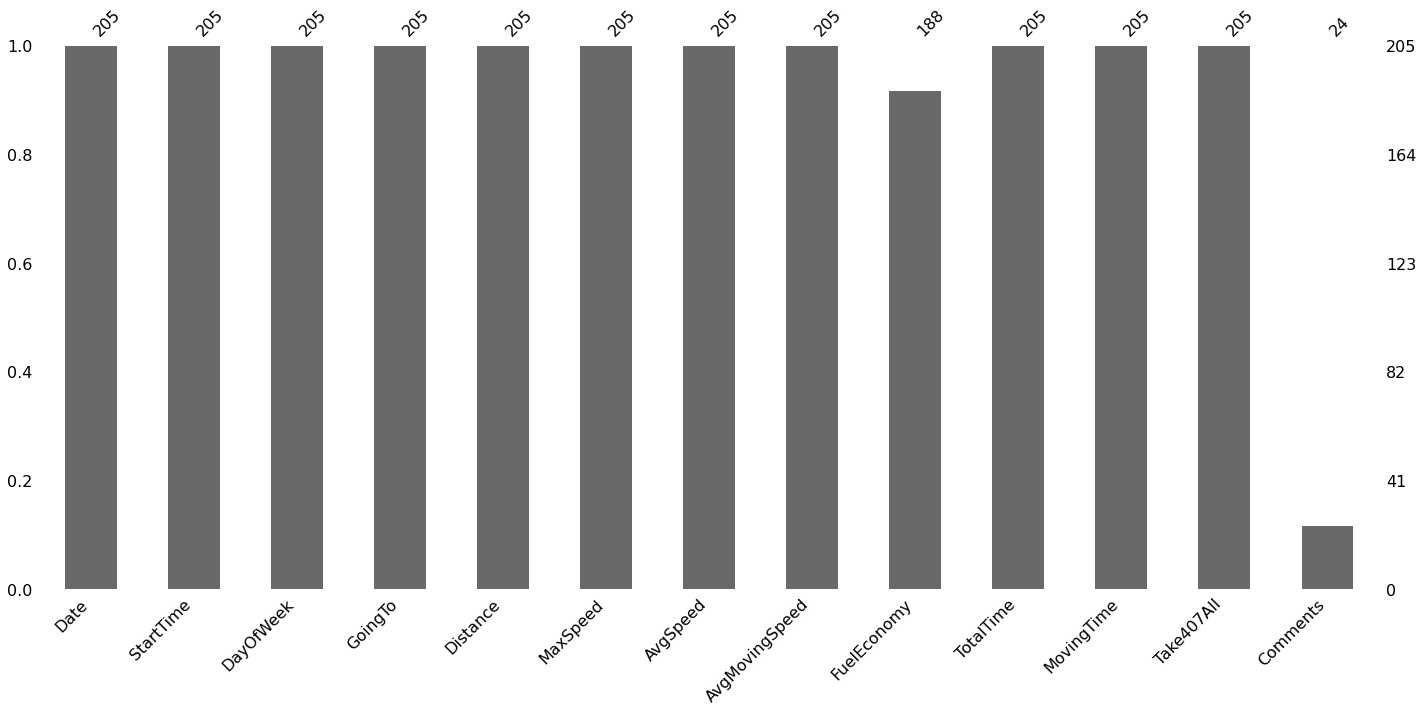

In [864]:
# 
msno.bar(df)

In [865]:
df.drop('Comments', axis=1, inplace=True)

In [866]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            205 non-null    object 
 1   StartTime       205 non-null    object 
 2   DayOfWeek       205 non-null    object 
 3   GoingTo         205 non-null    object 
 4   Distance        205 non-null    float64
 5   MaxSpeed        205 non-null    float64
 6   AvgSpeed        205 non-null    float64
 7   AvgMovingSpeed  205 non-null    float64
 8   FuelEconomy     188 non-null    object 
 9   TotalTime       205 non-null    float64
 10  MovingTime      205 non-null    float64
 11  Take407All      205 non-null    object 
dtypes: float64(6), object(6)
memory usage: 19.3+ KB


In [867]:
df["FuelEconomy"]= df["FuelEconomy"].replace('-', np.nan)

In [868]:
df["FuelEconomy"]= df["FuelEconomy"].astype(float)

In [869]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            205 non-null    object 
 1   StartTime       205 non-null    object 
 2   DayOfWeek       205 non-null    object 
 3   GoingTo         205 non-null    object 
 4   Distance        205 non-null    float64
 5   MaxSpeed        205 non-null    float64
 6   AvgSpeed        205 non-null    float64
 7   AvgMovingSpeed  205 non-null    float64
 8   FuelEconomy     186 non-null    float64
 9   TotalTime       205 non-null    float64
 10  MovingTime      205 non-null    float64
 11  Take407All      205 non-null    object 
dtypes: float64(7), object(5)
memory usage: 19.3+ KB


In [870]:
df['FuelEconomy'].fillna(round(df['FuelEconomy'].mean(),2), inplace=True)

In [871]:
df.head(10)

,Date,StartTime,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime,Take407All
0,1/6/2012,16:37,Friday,Home,51.29,127.4,78.3,84.8,8.69,39.3,36.3,No
1,1/6/2012,08:20,Friday,GSK,51.63,130.3,81.8,88.9,8.69,37.9,34.9,No
2,1/4/2012,16:17,Wednesday,Home,51.27,127.4,82.0,85.8,8.69,37.5,35.9,No
3,1/4/2012,07:53,Wednesday,GSK,49.17,132.3,74.2,82.9,8.69,39.8,35.6,No
4,1/3/2012,18:57,Tuesday,Home,51.15,136.2,83.4,88.1,8.69,36.8,34.8,No
5,1/3/2012,07:57,Tuesday,GSK,51.80,135.8,84.5,88.8,8.69,36.8,35.0,No
6,1/2/2012,17:31,Monday,Home,51.37,123.2,82.9,87.3,8.69,37.2,35.3,No
7,1/2/2012,07:34,Monday,GSK,49.01,128.3,77.5,85.9,8.69,37.9,34.3,No
8,12/23/2011,08:01,Friday,GSK,52.91,130.3,80.9,88.3,8.89,39.3,36.0,No
9,12/22/2011,17:19,Thursday,Home,51.17,122.3,70.6,78.1,8.89,43.5,39.3,No


In [872]:
df2 = pd.read_csv("/workspaces/Misk_DSI_data/Private/cars.csv", sep=";")
df2.head(10)

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,STRING,DOUBLE,INT,DOUBLE,DOUBLE,DOUBLE,DOUBLE,INT,CAT
1,Chevrolet Chevelle Malibu,NaN,8,307.0,130.0,3504.,12.0,70,US
2,Buick Skylark 320,15.0,8,350.0,NaN,3693.,11.5,70,US
3,Plymouth Satellite,NaN,8,318.0,150.0,3436.,11.0,70,US
4,AMC Rebel SST,16.0,8,NaN,150.0,NaN,12.0,70,US
5,Ford Torino,17.0,8,302.0,140.0,3449.,10.5,70,US
6,Ford Galaxie 500,NaN,8,429.0,NaN,4341.,10.0,70,US
7,Chevrolet Impala,14.0,8,454.0,220.0,4354.,9.0,70,US
8,Plymouth Fury iii,14.0,8,440.0,215.0,4312.,8.5,70,US
9,Pontiac Catalina,14.0,8,455.0,225.0,4425.,10.0,70,US


In [873]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Car           407 non-null    object
 1   MPG           404 non-null    object
 2   Cylinders     407 non-null    object
 3   Displacement  406 non-null    object
 4   Horsepower    405 non-null    object
 5   Weight        406 non-null    object
 6   Acceleration  407 non-null    object
 7   Model         407 non-null    object
 8   Origin        407 non-null    object
dtypes: object(9)
memory usage: 28.7+ KB


In [874]:
df2.isnull().sum()

Car             0
MPG             3
Cylinders       0
Displacement    1
Horsepower      2
Weight          1
Acceleration    0
Model           0
Origin          0
dtype: int64

<AxesSubplot:>

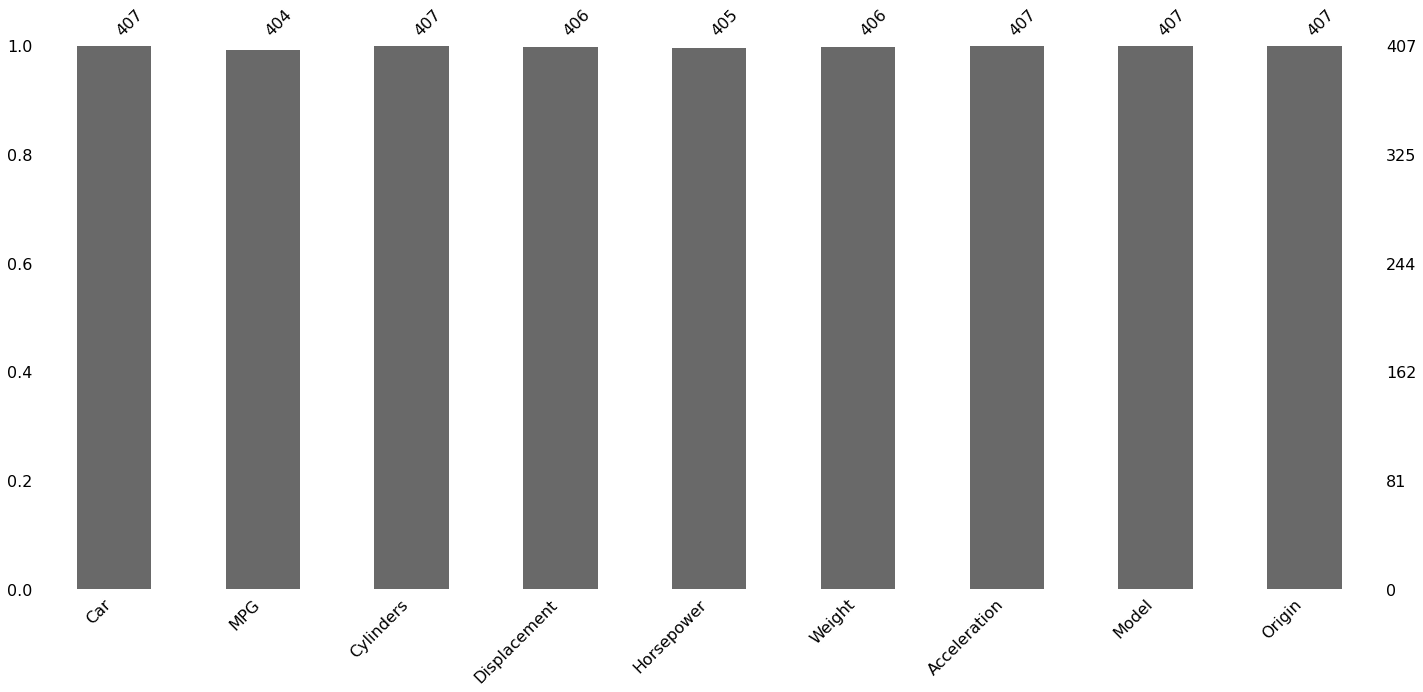

In [875]:
msno.bar(df2)

In [876]:
df2=df2.iloc[:,:-1].values
df2

array([['STRING', 'DOUBLE', 'INT', ..., 'DOUBLE', 'DOUBLE', 'INT'],
       ['Chevrolet Chevelle Malibu', nan, '8', ..., '3504.', '12.0',
        '70'],
       ['Buick Skylark 320', '15.0', '8', ..., '3693.', '11.5', '70'],
       ...,
       ['Dodge Rampage', '32.0', '4', ..., '2295.', '11.6', '82'],
       ['Ford Ranger', '28.0', '4', ..., '2625.', '18.6', '82'],
       ['Chevy S-10', '31.0', '4', ..., '2720.', '19.4', '82']],
      dtype=object)

In [878]:
s_imputer=SimpleImputer(missing_values=np.nan,strategy='mean',verbose=0)

In [879]:
s_imputer=s_imputer.fit(df2[1:,1:8])
df2[1:,1:8]=s_imputer.transform(df2[1:,1:8])
df2

array([['STRING', 'DOUBLE', 'INT', ..., 'DOUBLE', 'DOUBLE', 'INT'],
       ['Chevrolet Chevelle Malibu', 23.096277915632754, 8.0, ...,
        3504.0, 12.0, 70.0],
       ['Buick Skylark 320', 15.0, 8.0, ..., 3693.0, 11.5, 70.0],
       ...,
       ['Dodge Rampage', 32.0, 4.0, ..., 2295.0, 11.6, 82.0],
       ['Ford Ranger', 28.0, 4.0, ..., 2625.0, 18.6, 82.0],
       ['Chevy S-10', 31.0, 4.0, ..., 2720.0, 19.4, 82.0]], dtype=object)

In [880]:
y=pd.DataFrame(df2)
y.head()

,0,1,2,3,4,5,6,7
0,STRING,DOUBLE,INT,DOUBLE,DOUBLE,DOUBLE,DOUBLE,INT
1,Chevrolet Chevelle Malibu,23.096278,8.0,307.0,130.0,3504.0,12.0,70.0
2,Buick Skylark 320,15.0,8.0,350.0,103.143564,3693.0,11.5,70.0
3,Plymouth Satellite,23.096278,8.0,318.0,150.0,3436.0,11.0,70.0
4,AMC Rebel SST,16.0,8.0,194.509877,150.0,2978.293827,12.0,70.0


In [881]:
y.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64